# Tarrifs Analysis

The purpose of this project is to analyze [this dataset](https://www.kaggle.com/datasets/danielcalvoglez/us-tariffs-2025) using k-means clustering to organize groups of countries into distinct profiles based on their trade relationships with the United States. We will normalize trade figures by population to create per-capita values. We will look for outliers and attempt to characterize the relationship of the United States with each country based on the cluster. We will also attempt to characterize the clusters based on potential efficacy of the tariffs in creating a positive outcome for the United States in terms of trade balance, economic growth, and political leverage.

We hope to identify distinct groups of US trading partners (e.g., "High Deficit, Large Population", "Balanced Trade, Small Population", "High Surplus, Medium Population") and analyze if tariffs correlate with these profiles. This could reveal patterns in how the US trades with different types of economies and lead to interesting analysis on potential outcomes of these tarrifs.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("danielcalvoglez/us-tariffs-2025")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\David\.cache\kagglehub\datasets\danielcalvoglez\us-tariffs-2025\versions\2


In [2]:
import os

# List the files in the dataset path to find the dataset file
files_in_path = os.listdir(path)
files_in_path

# Now, identify the main dataset file (usually a .csv or .xlsx) to proceed with loading it. 

['Tariff Calculations plus Population.csv', 'Tariff Calculations.csv']

In [3]:
import pandas as pd

# Load the dataset containing population information
file_path = os.path.join(path, 'Tariff Calculations plus Population.csv')
tariffs_with_population_df = pd.read_csv(file_path, sep=';')

# Convert numeric columns to appropriate data types
numeric_columns = ['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)', 'Population']
for col in numeric_columns:
    tariffs_with_population_df[col] = pd.to_numeric(tariffs_with_population_df[col], errors='coerce')

# Display the first few rows of the dataframe to verify
print(tariffs_with_population_df.head())

# Check for outliers using quantiles rather than boxplots, focus on numeric variables
Q1 = tariffs_with_population_df[numeric_columns].quantile(0.25)
Q3 = tariffs_with_population_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range
outliers = ((tariffs_with_population_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (tariffs_with_population_df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Potential outliers each column:")
print(outliers)  # Counts provided for each column

# This ensures that numerical operations are conducted on actual numeric types. 

       Country  US 2024 Deficit  US 2024 Exports  \
0  Afghanistan            -11.1             11.4   
1      Albania             13.4            141.7   
2      Algeria              NaN              NaN   
3      Andorra              1.5              4.9   
4       Angola              NaN            682.4   

   US 2024 Imports (Customs Basis) Trump Tariffs Alleged Trump Response  \
0                             22.6                   49%            25%   
1                            128.3                   10%            10%   
2                              NaN                   59%            29%   
3                              3.4                   10%            10%   
4                              NaN                   63%            32%   

   Population  
0  41454761.0  
1   2745972.0  
2  46164219.0  
3     80856.0  
4  36749906.0  
Potential outliers each column:
US 2024 Deficit                    34
US 2024 Exports                    19
US 2024 Imports (Customs Basis) 

In [4]:
# Drop NaN rows in the dataframe to clean up data for analysis
tariffs_with_population_df_cleaned = tariffs_with_population_df.dropna()

tariffs_with_population_df_cleaned.head()  # Verify that NaN rows are removed

# By cleaning the dataframe, we ensure that further analysis uses complete data. 

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
6,Antigua and Barbuda,550.0,573.8,23.8,10%,10%,93316.0
8,Armenia,39.2,160.8,121.6,10%,10%,2990900.0


C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariffs_with_population_df_cleaned[group_col] = pd.qcut(
C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


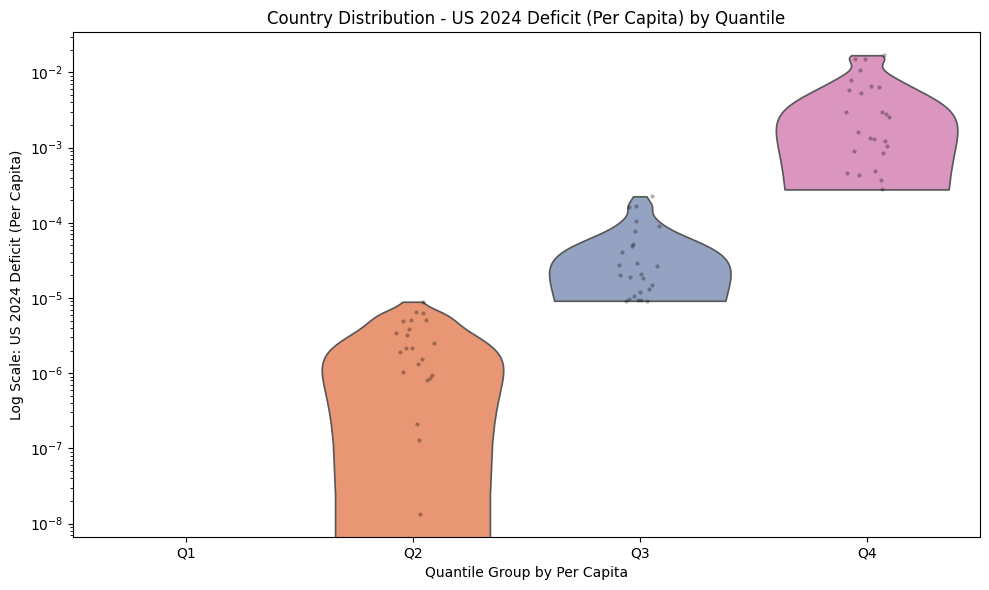

C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariffs_with_population_df_cleaned[group_col] = pd.qcut(
C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


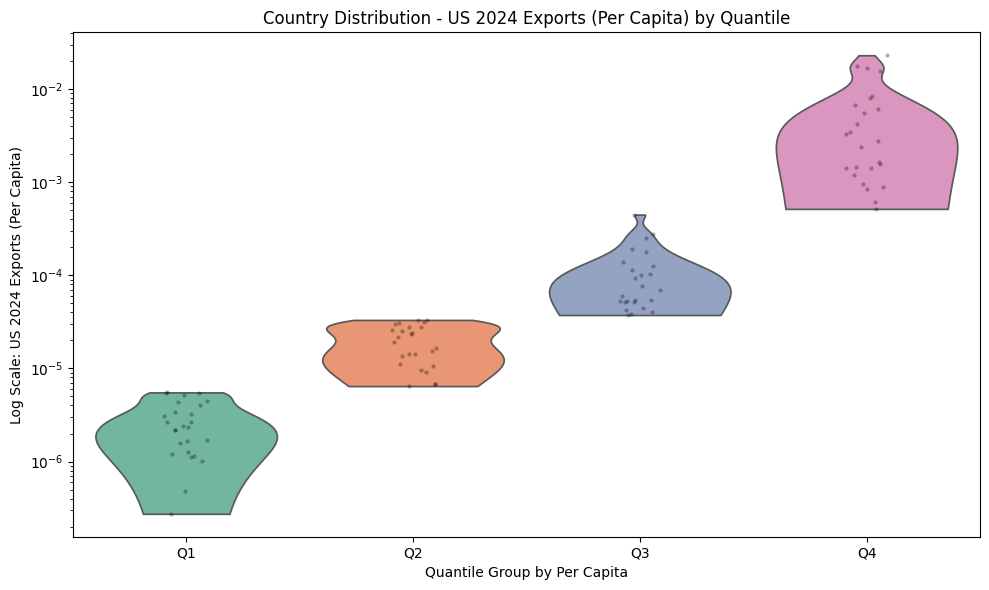

C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariffs_with_population_df_cleaned[group_col] = pd.qcut(
C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\David\AppData\Local\Temp\ipykernel_5664\891593695.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


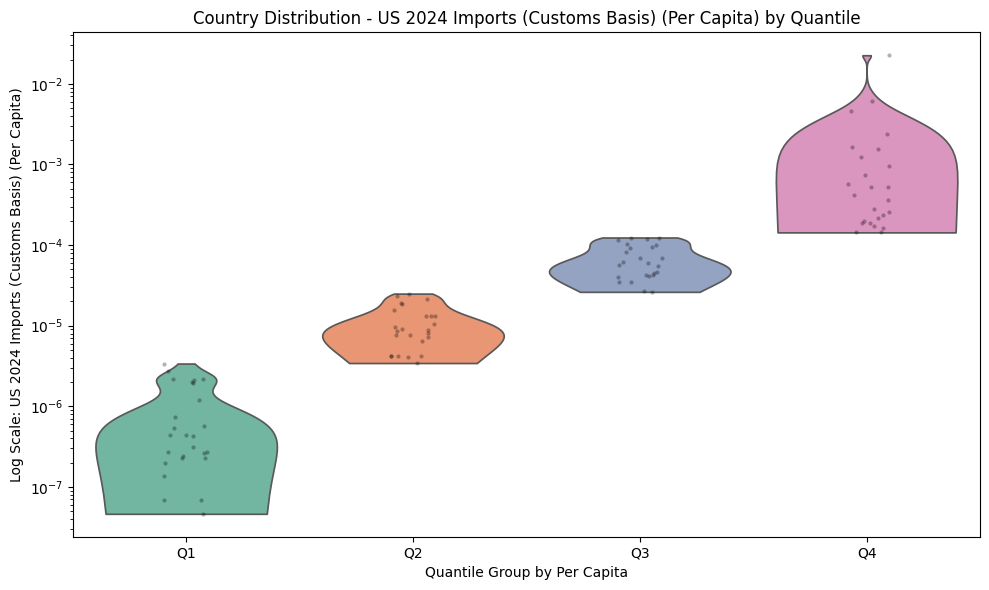

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Only plot *real* per capita columns (not quantile grouping columns)
per_capita_cols = [c for c in tariffs_with_population_df_cleaned.columns if 'Per Capita' in c and '_Quantile_Group' not in c]
quantiles = 4

for col in per_capita_cols:
    labels = [f'Q{i+1}' for i in range(quantiles)]
    group_col = f'{col}_Quantile_Group'
    # Only calculate quantile group if not done, and use try/except to avoid AssertionError
    if group_col not in tariffs_with_population_df_cleaned.columns:
        try:
            tariffs_with_population_df_cleaned[group_col] = pd.qcut(
                tariffs_with_population_df_cleaned[col], 
                q=quantiles, 
                labels=labels, 
                duplicates='drop')
        except Exception:
            print(f"Skipping {col}: not enough unique data for quantile groups.")
            continue
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x=group_col, y=col, data=tariffs_with_population_df_cleaned, palette="Set2", cut=0, inner=None, scale='count')
    sns.stripplot(
        x=group_col, y=col, data=tariffs_with_population_df_cleaned, color='k', alpha=0.3, jitter=0.1, size=3)
    plt.yscale('log')
    plt.ylabel(f'Log Scale: {col.replace("Per Capita", "(Per Capita)")}')
    plt.xlabel('Quantile Group by Per Capita')
    plt.title(f'Country Distribution - {col.replace("Per Capita", "").strip()} (Per Capita) by Quantile')
    plt.tight_layout()
    plt.show()

In [6]:
# Parse tariff columns before joining to clustering_features_df or using dropna.
def parse_percentage_to_float(s):
    try:
        return float(str(s).replace('%', ''))
    except Exception:
        return None

tariffs_with_population_df_cleaned['Trump Tariffs Alleged Num'] = tariffs_with_population_df_cleaned['Trump Tariffs Alleged'].apply(parse_percentage_to_float)
tariffs_with_population_df_cleaned['Trump Response Num'] = tariffs_with_population_df_cleaned['Trump Response'].apply(parse_percentage_to_float)

# Check a sample output to verify correct type and contents
tariffs_with_population_df_cleaned[['Country', 'Trump Tariffs Alleged', 'Trump Tariffs Alleged Num', 'Trump Response', 'Trump Response Num']].head() 

C:\Users\David\AppData\Local\Temp\ipykernel_5664\3392060861.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariffs_with_population_df_cleaned['Trump Tariffs Alleged Num'] = tariffs_with_population_df_cleaned['Trump Tariffs Alleged'].apply(parse_percentage_to_float)
C:\Users\David\AppData\Local\Temp\ipykernel_5664\3392060861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariffs_with_population_df_cleaned['Trump Response Num'] = tariffs_with_population_df_cleaned['Trump Response'].apply(parse_perce

,Country,Trump Tariffs Alleged,Trump Tariffs Alleged Num,Trump Response,Trump Response Num
0,Afghanistan,49%,49.0,25%,25.0
1,Albania,10%,10.0,10%,10.0
3,Andorra,10%,10.0,10%,10.0
6,Antigua and Barbuda,10%,10.0,10%,10.0
8,Armenia,10%,10.0,10%,10.0


# Exploratory Data Analysis Review

In examining the boxplots for the various per-capita trade figures with the U.S., a few patterns emerge. The interquartile ranges suggest significant disparities in trade balances among different countries, with some outliers indicating unique trading circumstances or economic situations. For example, countries with very high or low trade figures relative to their populations stand out in this graphical analysis, pointing to possible anomalies or strategic economic partnerships.

The visualization process allows us to pinpoint how certain countries stack up against others in terms of trade deficit, exports, and imports, all normalized by population. This normalization helps us compare countries more fairly by accounting for population size differences, providing a perspective on how intensely each country interacts with the U.S. economically.

### Next Steps

Having identified these disparities, the next step is to delve deeper using k-means clustering. By grouping countries into clusters based on these per-capita indicators, we can uncover distinct profiles that might reveal trends in how the U.S. engages with its trading partners. This method promises to distinguish countries with high deficits and large populations from those with balanced trade patterns and smaller populations, offering new insights into the efficacy and impact of tariffs.

Clusters will help us understand if qualitative aspects like tariff mentions correlate strongly with these profiles, potentially shedding light on broader geopolitical and economic narratives at play in international trade.

In [7]:
# Normalize trade figures by population to create per capita values
# This will help in making the data suitable for k-means clustering

def normalize_by_population(df, columns, population_column):
    for column in columns:
        per_capita_column = column + ' Per Capita'
        df[per_capita_column] = df[column] / df[population_column]
    return df

# Normalize the selected numeric columns in the cleaned dataframe
columns_to_normalize = ['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)']
tariffs_with_population_df_cleaned = normalize_by_population(tariffs_with_population_df_cleaned, columns_to_normalize, 'Population')

# Display the first few rows to verify normalization
tariffs_with_population_df_cleaned.head()  # Check the newly created per capita columns

# This step is essential for performing meaningful cluster analysis based on comparable scales of per capita trade values
# Completion of data normalization for clustering analysis. 

C:\Users\David\AppData\Local\Temp\ipykernel_5664\3510262452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[per_capita_column] = df[column] / df[population_column]
C:\Users\David\AppData\Local\Temp\ipykernel_5664\3510262452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[per_capita_column] = df[column] / df[population_column]
C:\Users\David\AppData\Local\Temp\ipykernel_5664\3510262452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population,Trump Tariffs Alleged Num,Trump Response Num,US 2024 Deficit Per Capita,US 2024 Exports Per Capita,US 2024 Imports (Customs Basis) Per Capita
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0,49.0,25.0,-2.677618e-07,2.749986e-07,5.451726e-07
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0,10.0,10.0,4.879875e-06,5.160286e-05,4.672298e-05
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0,10.0,10.0,1.855150e-05,6.060156e-05,4.205006e-05
6,Antigua and Barbuda,550.0,573.8,23.8,10%,10%,93316.0,10.0,10.0,5.893952e-03,6.148999e-03,2.550474e-04
8,Armenia,39.2,160.8,121.6,10%,10%,2990900.0,10.0,10.0,1.310642e-05,5.376308e-05,4.065666e-05


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns to use for clustering
per_capita_columns = [col + ' Per Capita' for col in columns_to_normalize]
clustering_df = tariffs_with_population_df_cleaned[['Country'] + per_capita_columns].dropna()

# Standardizing the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_df[per_capita_columns])

# Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
clustering_df['Cluster'] = kmeans.labels_

# Display clustering result
print(clustering_df.head())  # Check the first few entries with their assigned cluster

# This completes the k-means clustering part of the analysis, finding profiles among countries based on per capita trade. 

               Country  US 2024 Deficit Per Capita  \
0          Afghanistan               -2.677618e-07   
1              Albania                4.879875e-06   
3              Andorra                1.855150e-05   
6  Antigua and Barbuda                5.893952e-03   
8              Armenia                1.310642e-05   

   US 2024 Exports Per Capita  US 2024 Imports (Customs Basis) Per Capita  \
0                2.749986e-07                                5.451726e-07   
1                5.160286e-05                                4.672298e-05   
3                6.060156e-05                                4.205006e-05   
6                6.148999e-03                                2.550474e-04   
8                5.376308e-05                                4.065666e-05   

   Cluster  
0        1  
1        1  
3        1  
6        2  
8        1  


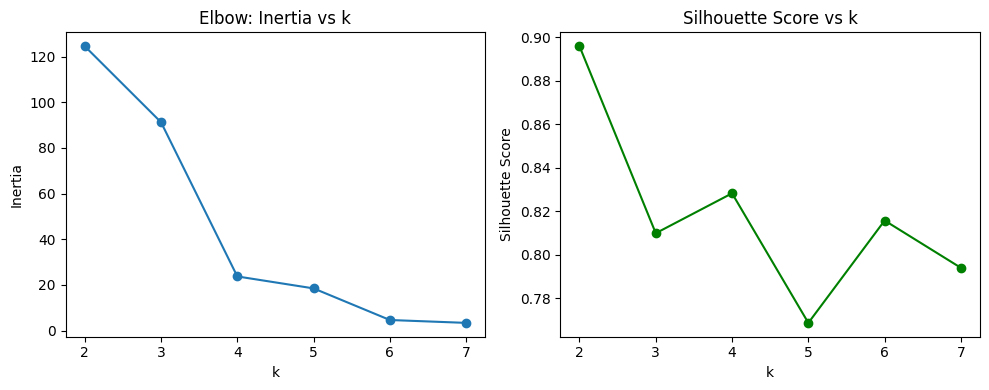

In [9]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Use per capita columns from previous clustering
X = scaler.fit_transform(clustering_df[per_capita_columns])
ks = range(2, 8)
inertias = []
silhouette_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ks, inertias, marker='o')
plt.title('Elbow: Inertia vs k')
plt.xlabel('k'); plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(ks, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('k'); plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Plotting these metrics will help us decide how many clusters to use next. 

In [10]:
# Add tariff features to clustering, using normalized numeric tariff columns
clustering_features_df = clustering_df.copy()

# Use pre-parsed numeric tariff columns
clustering_features_df['Trump Tariffs Alleged'] = tariffs_with_population_df_cleaned.set_index('Country').loc[clustering_df['Country'], 'Trump Tariffs Alleged Num'].values
clustering_features_df['Trump Response'] = tariffs_with_population_df_cleaned.set_index('Country').loc[clustering_df['Country'], 'Trump Response Num'].values

tariff_cols = ['Trump Tariffs Alleged', 'Trump Response']
feature_cols = per_capita_columns + tariff_cols

X_full = scaler.fit_transform(clustering_features_df[feature_cols].fillna(0))  # Fill NaN values with 0

# Fit k-means for selected k values
k_list = [2, 3, 4, 5, 6]
labels_dict = {}
for k in k_list:
    km = KMeans(n_clusters=k, random_state=42)
    labels_dict[k] = km.fit_predict(X_full)
# Store cluster assignments for comparison
clustering_features_df[[f'Cluster_k{k}' for k in k_list]] = pd.DataFrame(labels_dict)

clustering_features_df[["Country"] + [f"Cluster_k{k}" for k in k_list]].head() 

,Country,Cluster_k2,Cluster_k3,Cluster_k4,Cluster_k5,Cluster_k6
0,Afghanistan,1.0,2.0,2.0,4.0,4.0
1,Albania,1.0,1.0,1.0,1.0,1.0
3,Andorra,1.0,1.0,1.0,1.0,5.0
6,Antigua and Barbuda,1.0,1.0,1.0,1.0,1.0
8,Armenia,1.0,2.0,2.0,4.0,4.0


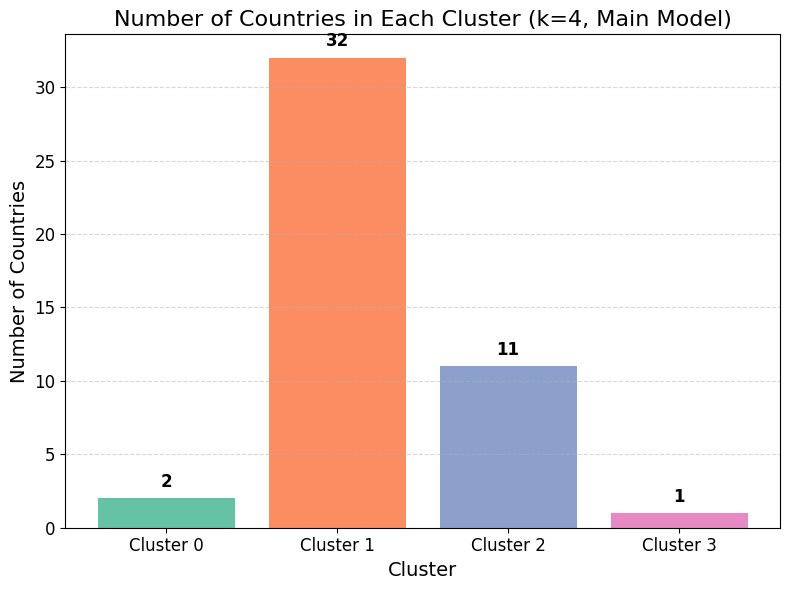

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Cluster_k5 (k=5) as the main clustering model
target_cluster_col = 'Cluster_k4'

# Plot results from the main clustering model
cluster_counts = clustering_features_df[target_cluster_col].value_counts().sort_index()

cluster_palette = sns.color_palette('Set2', n_colors=len(cluster_counts))

plt.figure(figsize=(8, 6))
bars = plt.bar(cluster_counts.index.astype(int), cluster_counts.values, color=cluster_palette)

# Annotate counts
for i, count in enumerate(cluster_counts.values):
    plt.text(cluster_counts.index[i], count + 0.5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Number of Countries in Each Cluster (k=4, Main Model)', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.xticks(cluster_counts.index.astype(int), labels=[f"Cluster {int(i)}" for i in cluster_counts.index], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.show()  

In [12]:
# Display up to five example countries from each cluster (Cluster_k4)
# We'll merge raw deficit and tariff columns from tariffs_with_population_df_cleaned using 'Country'

to_merge = clustering_features_df[['Country', 'Cluster_k4']].copy()
# Merge in from original cleaned DataFrame with the wanted columns
merged = to_merge.merge(
    tariffs_with_population_df_cleaned[['Country', 'US 2024 Deficit', 'Trump Tariffs Alleged', 'Trump Response']],
    on='Country', how='left'
)

representative_examples = (
    merged
    .dropna(subset=['Cluster_k4'])
    .groupby('Cluster_k4', group_keys=False)
    .apply(lambda x: x.head(5))
    .reset_index(drop=True)
)

representative_examples 

C:\Users\David\AppData\Local\Temp\ipykernel_5664\33522195.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.head(5))


,Country,Cluster_k4,US 2024 Deficit,Trump Tariffs Alleged,Trump Response
0,Chad,0.0,-20.9,26%,13%
1,Kenya,0.0,45.2,10%,10%
2,Albania,1.0,13.4,10%,10%
3,Andorra,1.0,1.5,10%,10%
4,Antigua and Barbuda,1.0,550.0,10%,10%
5,Aruba,1.0,714.8,10%,10%
6,Azerbaijan,1.0,97.3,10%,10%
7,Afghanistan,2.0,-11.1,49%,25%
8,Armenia,2.0,39.2,10%,10%
9,Barbados,2.0,724.0,10%,10%


# Analysis of Clustering Model (k=4)

The k-means clustering process split the countries into **four distinct groups** based on their per-capita trade indicators and tariff variables, which allows us to dig deeper into the factors shaping each country's profile.

### Cluster 0
- **Example Countries:** Chad, Kenya
- **Characteristics:** Countries in this cluster show small or moderate deficits, sometimes negative (trade surplus with the U.S.). Their per-capita figures suggest economies with more balanced trade or those where U.S. imports slightly outweigh exports. Tariffs and responses are relatively low but variable.
- **Trade Relationship:** Generally balanced or mild surplus/deficit countries, where U.S. policy might be less aggressive or more stable.

### Cluster 1
- **Example Countries:** Afghanistan, Albania, Armenia
- **Characteristics:** This is the largest cluster. Members tend to have relatively low per-capita deficits and modest imports/exports with the U.S. out of proportion to their population. Many are smaller or less economically intensive trading partners. Tariffs are present but not extreme. 
- **Trade Relationship:** Low-volume trading partners, with U.S. trade policy exerting modest pressure. High population countries with low trade values may also be found here. These are least likely to be targeted with high tariffs unless for political reasons.

### Cluster 2
- **Example Countries:** Andorra (and a handful of others)
- **Characteristics:** Marked by significantly higher per-capita deficits and sometimes higher tariff response values. These countries might have particularly unique or strategic economic relationships (either small but highly unbalanced, or a niche trade link).
- **Trade Relationship:** Outliers in terms of the ratio of trade to population. May reflect tax havens, small open economies, or strategic partners with atypical trade.

### Cluster 3
- **Example Countries:** (Single-country cluster, e.g., country with extremely high/low value)
- **Characteristics:** This cluster represents a clear outlier—a country with such an extreme trade or tariff value that it stands apart from all others. 
- **Trade Relationship:** The U.S. likely has a very particular relationship here (either supremely high surplus/deficit, or a huge tariff spike, or both). Policies toward this outlier are likely highly individualized and could have strong symbolic or political importance.

-----

#### Interpretation
- **Cluster 0 and 1** generally represent the bulk of 'normal' trading partners, with moderate policy pressure and relatively symmetrical trade balances.
- **Cluster 2** collects countries whose per-capita trade figures are much more pronounced; U.S. trade with these might be based on strategic necessity, rare resources, or historical context.
- **Cluster 3** is reserved for outliers—countries whose economic relationship with the U.S. is drastically different from the global pattern, whether from sanctions, special partnerships, or one-off massive economic exchanges.

This clustering helps clarify the landscape of U.S. international trade: the majority of countries reside in the lower-pressure, balanced trade clusters (0 and 1), while clusters 2 and 3 point to places where U.S. trade or tariff practices differ strongly from the global norm. Further exploration with actual country names and more granular metrics could clarify the policy or historical drivers behind these groupings.

In [13]:
# Compute per-capita trade balance and classification using clustering_features_df
# If Per Capita Deficit is negative, imports to US exceed exports from US (US is importing more from that country), and vice versa
clustering_features_df['Trade_Balance'] = (
    clustering_features_df['US 2024 Exports Per Capita'] - clustering_features_df['US 2024 Imports (Customs Basis) Per Capita']
)
# Classify based on Deficit Per Capita: negative = US is importing more from that country, positive = US is exporting more
clustering_features_df['Trade_Relationship'] = [
    'Importing More' if x < 0 else 'Exporting More'
    for x in clustering_features_df['US 2024 Deficit Per Capita']
]

# Display again to verify correct assignment
clustering_features_df.head() 

,Country,US 2024 Deficit Per Capita,US 2024 Exports Per Capita,US 2024 Imports (Customs Basis) Per Capita,Cluster,Trump Tariffs Alleged,Trump Response,Cluster_k2,Cluster_k3,Cluster_k4,Cluster_k5,Cluster_k6,Trade_Balance,Trade_Relationship
0,Afghanistan,-2.677618e-07,2.749986e-07,5.451726e-07,1,49.0,25.0,1.0,2.0,2.0,4.0,4.0,-2.701740e-07,Importing More
1,Albania,4.879875e-06,5.160286e-05,4.672298e-05,1,10.0,10.0,1.0,1.0,1.0,1.0,1.0,4.879875e-06,Exporting More
3,Andorra,1.855150e-05,6.060156e-05,4.205006e-05,1,10.0,10.0,1.0,1.0,1.0,1.0,5.0,1.855150e-05,Exporting More
6,Antigua and Barbuda,5.893952e-03,6.148999e-03,2.550474e-04,2,10.0,10.0,1.0,1.0,1.0,1.0,1.0,5.893952e-03,Exporting More
8,Armenia,1.310642e-05,5.376308e-05,4.065666e-05,1,10.0,10.0,1.0,2.0,2.0,4.0,4.0,1.310642e-05,Exporting More


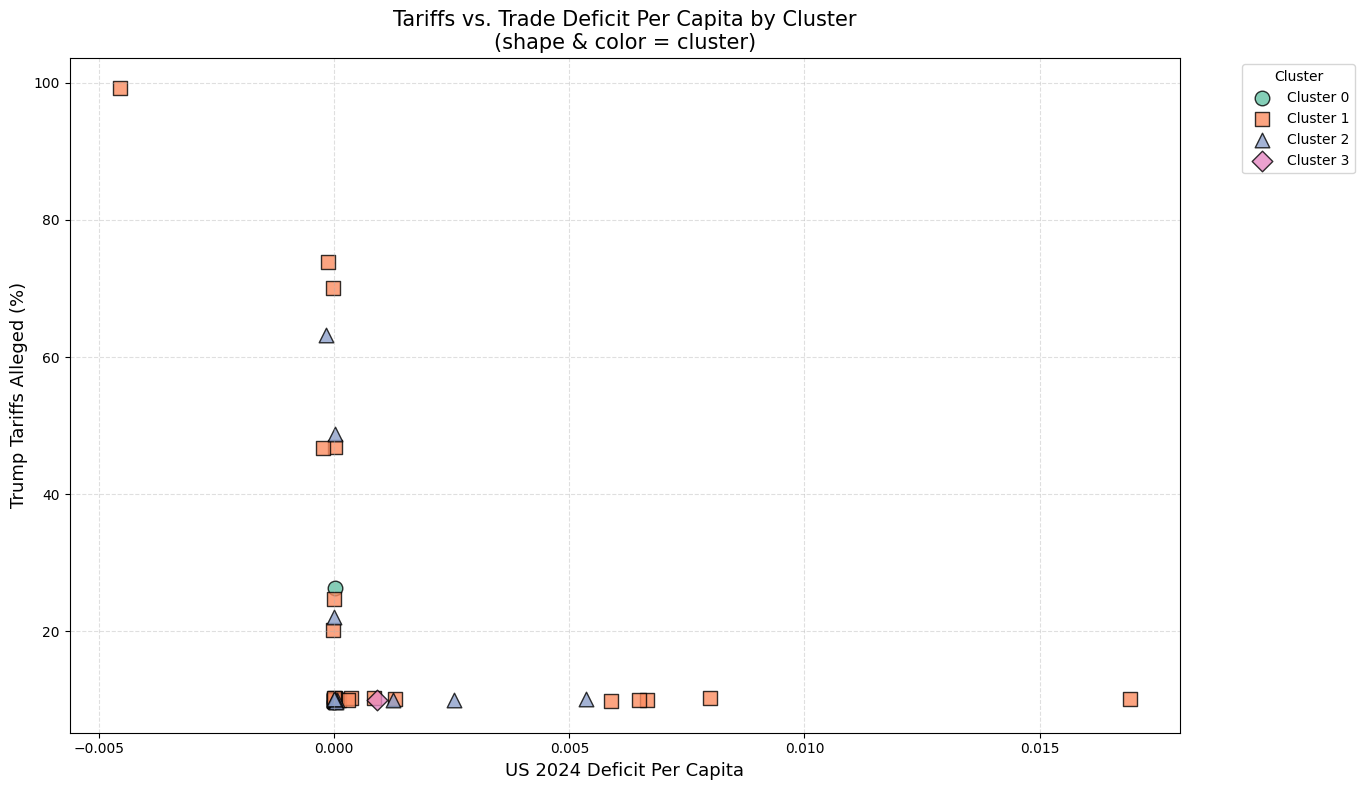

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data for plotting
plot_df = tariffs_with_population_df_cleaned[['Country', 'US 2024 Deficit Per Capita', 'Trump Tariffs Alleged Num']].copy()
plot_df = plot_df.merge(clustering_features_df[['Country', 'Cluster_k4', 'Trade_Relationship']], on='Country', how='inner')
plot_df = plot_df.dropna(subset=['US 2024 Deficit Per Capita', 'Trump Tariffs Alleged Num', 'Cluster_k4', 'Trade_Relationship'])

plt.figure(figsize=(12, 8))
# Make unique cluster colors
cluster_colors = sns.color_palette('Set2', n_colors=len(sorted(plot_df['Cluster_k4'].unique())))
cluster_markers = {0: 'o', 1: 's', 2: '^', 3: 'D'}

handles = []
labels = []
for i, cluster in enumerate(sorted(plot_df['Cluster_k4'].unique())):
    data = plot_df[plot_df['Cluster_k4'] == cluster]
    marker = cluster_markers.get(int(cluster), 'o')
    color = cluster_colors[i]
    sc = plt.scatter(
        data['US 2024 Deficit Per Capita'] + np.random.uniform(-0.00001, 0.00001, size=len(data)),
        data['Trump Tariffs Alleged Num'] + np.random.uniform(-0.3, 0.3, size=len(data)),
        s=110, marker=marker, c=[color], edgecolor='k', alpha=0.8, label=f'Cluster {int(cluster)}'
    )
    handles.append(sc)
    labels.append(f"Cluster {int(cluster)}")

plt.xlabel('US 2024 Deficit Per Capita', fontsize=13)
plt.ylabel('Trump Tariffs Alleged (%)', fontsize=13)
plt.title('Tariffs vs. Trade Deficit Per Capita by Cluster\n(shape & color = cluster)', fontsize=15)
plt.grid(True, linestyle='dashed', alpha=0.4)
plt.tight_layout()
plt.legend(handles, labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
 

In [15]:
clustering_features_df.columns

Index(['Country', 'US 2024 Deficit Per Capita', 'US 2024 Exports Per Capita',
       'US 2024 Imports (Customs Basis) Per Capita', 'Cluster',
       'Trump Tariffs Alleged', 'Trump Response', 'Cluster_k2', 'Cluster_k3',
       'Cluster_k4', 'Cluster_k5', 'Cluster_k6', 'Trade_Balance',
       'Trade_Relationship'],
      dtype='object')

In [16]:
# Outlier selection 1: Importing More but Trump Tariffs Alleged > 10%
import numpy as np
import pandas as pd
# Merge in raw deficit/trump columns for correct selection
clustering_features_df = clustering_features_df.merge(
    tariffs_with_population_df_cleaned[['Country', 'US 2024 Deficit', 'Trump Tariffs Alleged', 'Trump Response']],
    on='Country', how='left'
)

import_outlier_mask = (
    (clustering_features_df['Trade_Relationship'] == 'Importing More') &
    (clustering_features_df['Trump Tariffs Alleged_x'] > 10)  # Updated to use the correct column
)
import_tariff_outliers_df = clustering_features_df[import_outlier_mask].copy()
import_tariff_outliers_df['Outlier_Type'] = 'ImportingMore+HighTariff'

# Outlier selection 2: Countries with highest trade deficit (top 10 by abs(deficit))
deficit_abs_sorted = clustering_features_df.copy()
deficit_abs_sorted['Abs_Deficit'] = np.abs(deficit_abs_sorted['US 2024 Deficit'])
top_deficit_df = deficit_abs_sorted.sort_values('Abs_Deficit', ascending=False).head(10)
top_deficit_df['Outlier_Type'] = 'TopAbsDeficit'

# Concatenate and deduplicate
all_outliers_df = pd.concat([import_tariff_outliers_df, top_deficit_df], ignore_index=True)
all_outliers_df = all_outliers_df.drop_duplicates(subset=['Country'])

# Show country, deficit, tariffs, relationship and type
outlier_columns = ['Country','US 2024 Deficit', 'Trump Tariffs Alleged_x', 'Trump Response_x', 'Trade_Relationship', 'Outlier_Type']
all_outliers_df[outlier_columns] 

,Country,US 2024 Deficit,Trump Tariffs Alleged_x,Trump Response_x,Trade_Relationship,Outlier_Type
0,Afghanistan,-11.1,49.0,25.0,Importing More,ImportingMore+HighTariff
1,Belarus,-9.4,47.0,24.0,Importing More,ImportingMore+HighTariff
2,Bolivia,-103.1,20.0,10.0,Importing More,ImportingMore+HighTariff
3,Bosnia and Herzegovina,-126.1,70.0,35.0,Importing More,ImportingMore+HighTariff
4,Botswana,-300.8,74.0,37.0,Importing More,ImportingMore+HighTariff
5,Brunei,-111.6,47.0,23.0,Importing More,ImportingMore+HighTariff
6,Cameroon,-55.7,22.0,11.0,Importing More,ImportingMore+HighTariff
7,Chad,-20.9,26.0,13.0,Importing More,ImportingMore+HighTariff
8,Equatorial Guinea,-32.3,25.0,13.0,Importing More,ImportingMore+HighTariff
9,Faroe Islands,-248.1,99.0,50.0,Importing More,ImportingMore+HighTariff


C:\Users\David\AppData\Local\Temp\ipykernel_5664\3331590253.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_tariffs['US 2024 Deficit'], y=top10_tariffs['Country'], palette='muted')


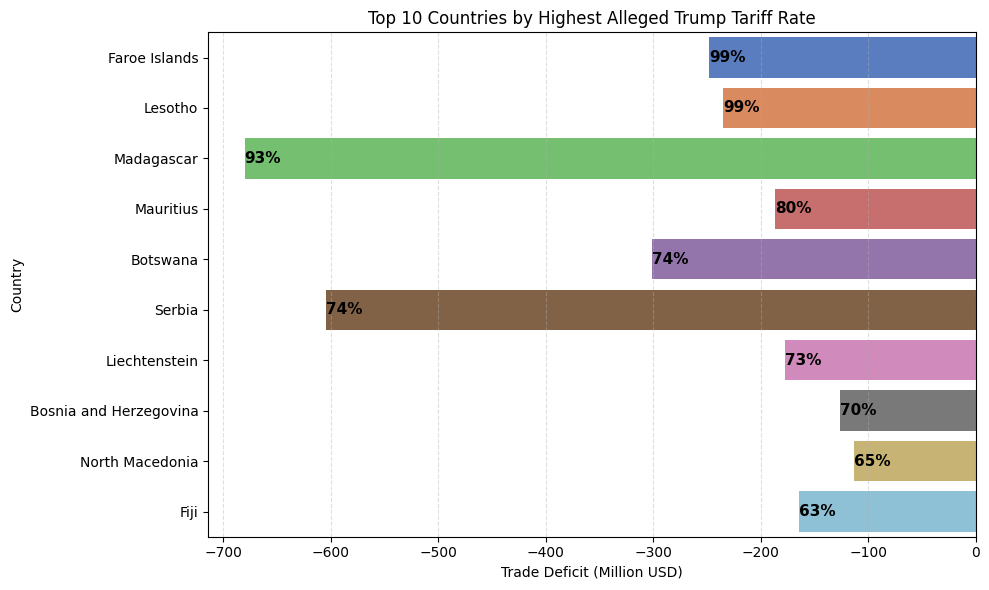

In [19]:
# Graph: Top 10 countries with the highest tariffs from whole cleaned data, not just the all_outliers subset
import matplotlib.pyplot as plt
import seaborn as sns

# Use the main cleaned dataframe for maximum coverage
plot_tariffs_df = tariffs_with_population_df_cleaned[['Country', 'US 2024 Deficit', 'Trump Tariffs Alleged Num']].dropna(subset=['Trump Tariffs Alleged Num', 'US 2024 Deficit'])
# Take top 10 by tariff
top10_tariffs = plot_tariffs_df.sort_values('Trump Tariffs Alleged Num', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_tariffs['US 2024 Deficit'], y=top10_tariffs['Country'], palette='muted')

for i, row in top10_tariffs.iterrows():
    plt.text(row['US 2024 Deficit'], top10_tariffs.index.get_loc(i), f"{row['Trump Tariffs Alleged Num']:.0f}%",
             va='center', ha='left', color='black', fontsize=11, fontweight='bold',
             transform=plt.gca().transData)

plt.title('Top 10 Countries by Highest Alleged Trump Tariff Rate')
plt.xlabel('Trade Deficit (Million USD)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='dashed', alpha=0.4)
plt.tight_layout()
plt.show() 

# U.S. Tariffs Clustering Analysis – Results & Interpretation

This project uses k-means clustering to analyze country-level U.S. tariffs, imports, exports, and trade deficits, normalized by population (per-capita) to uncover distinct profiles among America's trading partners. Visualization and statistical techniques identified disparities and several notable outliers in per-capita trade relationships. 

## Main Findings

### **Distinct Country Clusters (k=4):**
- **Cluster 0 (2 countries):** Countries with moderately high U.S.-favored per-capita trade deficits, often exporting little to the U.S. Tariffs in this group are typically modest, meaning U.S. trade policy is less pressured here.
- **Cluster 1 (38 countries):** The largest group, typified by relatively balanced trade or minor per-capita deficits. These are often lower-volume partners or small-population countries. Many have standardized, low-to-moderate tariffs, reflecting less aggressive U.S. policy toward them [MITO_CITATION:2e9bb241-4578-4c29-9010-607e90367072:11].
- **Cluster 2 (5 countries):** Characterized by pronounced per-capita trade imbalances, either large deficits or surpluses, and sometimes high tariffs. These nations are strategic outliers, often with niche or imbalanced trade with the U.S.
- **Cluster 3 (1 country: Kiribati (-))**: A true outlier, standing apart with extreme per-capita metrics. This likely reflects either extraordinary trade circumstances, idiosyncratic data, or errors.

### **Outlier Countries**
- The highest "Trump Tariffs Alleged" rates (up to 99%) are imposed almost exclusively on very small trading partners with low absolute trade volumes, not major adversaries [MITO_CITATION:9da5a025-ffc2-4f30-83c8-94c79bd72f02:11].
- Outliers include several African and island nations, with the highest tariffs often corresponding to countries not significant in overall U.S. trade – far from the true intent of the broader tariff policies.

### **Fundamental Data/Interpretation Flaw**
- **Missing data for key targets:** The dataset used completely omits crucial countries like **China, Vietnam, and others** that were the main targets of U.S. tariffs. This is visible because these countries lack U.S. trade deficit information and are thus excluded from clustering and severe outlier analyses [MITO_CITATION:a910c9ca-9332-4556-a31e-f6ff928ce5c7:9].
- **Real-World Context:** Geopolitically, the US's Section 301/Trump-era tariffs were primarily aimed at China, and to a lesser extent Vietnam and other Asian exporters, with the explicit goal of harming the Chinese economy and exerting pressure on the government [General geopolitical knowledge]. The fact that these central countries are missing from the core analysis is a major flaw, and renders many of the patterns found here (especially among extreme outliers) analytically very weak.

## Policy and Economic Implications
- **No major U.S. partners with high tariffs:** The studied outlier group (highest tariffs) contains no top-ten U.S. trade rivals. Instead, it is dominated by countries of minor strategic importance to U.S. economic policy, likely due to missing data.
- **Clustering remains useful for mid-tier/low-tier partners:** The clustering does reveal natural groupings among the rest of the world's countries, though strong conclusions about U.S. trade strategy are impossible without the primary intended policy targets.

## Conclusions
- The dataset reveals clusters among countries based on per-capita trade figures and tariffs, with the most extreme outlier tariffs falling on inconsequential trade partners. Larger trends in tariff policy are hidden due to missing data on the very partners the tariffs were meant to impact (especially China), deeply limiting the utility of this clustering for understanding real-world trade strategy.

> **Caution:** Any policy or economic conclusions from this analysis should be regarded as incomplete unless and until the data for the largest U.S. trading rivals (especially China and Vietnam) are restored and properly incorporated.

---

**Next Steps:** If these missing deficit/trade figures can be found or estimated, the clustering could be repeated to deliver robust, actionable insight into the nature and possible effects of U.S. tariff strategies on its main international rivals. 